In [543]:
import pandas as pd

In [544]:
df=pd.read_csv('Airbnb Berlin.csv')

In [545]:
df.shape

(456961, 47)

In [546]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456961 entries, 0 to 456960
Data columns (total 47 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   index                  456961 non-null  int64  
 1   Review ID              452805 non-null  float64
 2   review_date            452805 non-null  object 
 3   Reviewer ID            452805 non-null  float64
 4   Reviewer Name          452805 non-null  object 
 5   Comments               452595 non-null  object 
 6   Listing ID             456961 non-null  int64  
 7   Listing URL            456961 non-null  object 
 8   Listing Name           456756 non-null  object 
 9   Host ID                456961 non-null  int64  
 10  Host URL               456961 non-null  object 
 11  Host Name              456913 non-null  object 
 12  Host Since             456913 non-null  object 
 13  Host Response Time     398194 non-null  object 
 14  Host Response Rate     398194 non-nu

In [547]:
df.Country.nunique()

3

In [548]:
df=df[df['Country']=='Germany']
df = df.drop(columns=['Country','Country Code']) # Only Germany, no need for these single value columns

In [549]:
print (df['Listing ID'].nunique(), df['Listing URL'].nunique()) # suspected 1:1 correlation columns
print (df['Host ID'].nunique(), df['Host URL'].nunique()) # suspected 1:1 correlation columns

23534 23534
19770 19770


In [550]:
df = df.drop(columns=['Listing URL','Host URL']) # reduandant columns. We'll stay with 'Listing ID' and 'Host ID'

In [551]:
df['Business Travel Ready'].nunique() #suspected single value column

1

In [552]:
df = df.drop(columns=['Business Travel Ready']) # Single value (all false) in this column

In [553]:
len(df)

456959

In [554]:
df_full=df  # As agreed with Orit, keep reviews seperately and keep df w/o reviews
# NOT WORKING. GETS STUCK  df_full.to_excel("airbnb.xlsx", sheet_name='with_reviews')

In [555]:
df = df.groupby('Listing ID').first().reset_index()
df = df.drop(columns=['index','Review ID','review_date','Reviewer ID','Reviewer Name','Comments']) # ommitted by this grouping
len(df)

23534

In [556]:
# NOT WORKING. GETS STUCK  df.to_excel("airbnb.xlsx", sheet_name='without_reviews')

In [557]:
df.head()

Listing ID             Listing Name              Host ID    Host Name     \
0      2695     Prenzlauer Berg close to Mauerpark    2986          Michael   
1      3176        Fabulous Flat in great Location    3718           Britta   
2      7071       BrightRoom with sunny greenview!   17391       BrightRoom   
3      9991    Geourgeous flat - outstanding views   33852          Philipp   
4     14325           Apartment in Prenzlauer Berg   55531   Chris + Oliver   

  Host Since Host Response Time Host Response Rate Is Superhost  \
0  09-16-08      within a day           50%              f        
1  10-19-08      within a day           50%              f        
2  05-16-09    within an hour          100%              t        
3  08-25-09      within a day          100%              f        
4  11-18-09      within a day          100%              f        

   neighbourhood   Neighborhood Group   City  Postal Code  Latitude  \
0  Prenzlauer Berg       Pankow        Berlin      10437   52.54851   
1  Prenzlauer Berg       Pankow        Berlin    10405.0   52.53500   
2  Prenzlauer Berg       Pankow        Berlin    10437.0   52.54316   
3  Prenzlauer Berg       Pankow        Berlin    10405.0   52.53303   
4  Prenzlauer Berg       Pankow        Berlin      10437   52.54785   

   Longitude Is Exact Location Property Type    Room Type      Accomodates  \
0  13.40455           t           Apartment      Private room       2        
1  13.41758           t           Apartment   Entire home/apt       4        
2  13.41509           t           Apartment      Private room       2        
3  13.41605           f           Apartment   Entire home/apt       7        
4  13.40556           t           Apartment   Entire home/apt       1        

   Bathrooms  Bedrooms  Beds  Square Feet  Price   Guests Included  \
0     1.0        1.0     1.0       NaN      17.00         1          
1     1.0        1.0     2.0     720.0      90.00         2          
2     1.0        1.0     2.0       NaN      33.00         1          
3     2.5        4.0     7.0       NaN     180.00         5          
4     1.0        0.0     1.0       NaN      70.00         1          

   Min Nights  Reviews First Review Last Review  Overall Rating  \
0       2          7     07-04-18     04-21-19        100.0       
1      62        144     06-20-09     10-29-18         92.0       
2       2        229     08-18-09     05-08-19         96.0       
3       6          6     08-09-15     07-23-18        100.0       
4      90         23     06-29-10     11-01-18         93.0       

   Accuracy Rating  Cleanliness Rating  Checkin Rating  Communication Rating  \
0       10.0               10.0              10.0               10.0           
1        9.0                9.0               9.0                9.0           
2       10.0               10.0              10.0               10.0           
3       10.0               10.0              10.0               10.0           
4       10.0               10.0               9.0               10.0           

   Location Rating  Value Rating Instant Bookable  
0        9.0            10.0             f         
1       10.0             9.0             f         
2       10.0            10.0             f         
3       10.0            10.0             f         
4        9.0             9.0             f

In [558]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23534 entries, 0 to 23533
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Listing ID            23534 non-null  int64  
 1   Listing Name          23480 non-null  object 
 2   Host ID               23534 non-null  int64  
 3   Host Name             23513 non-null  object 
 4   Host Since            23513 non-null  object 
 5   Host Response Time    13044 non-null  object 
 6   Host Response Rate    13044 non-null  object 
 7   Is Superhost          23513 non-null  object 
 8   neighbourhood         23534 non-null  object 
 9   Neighborhood Group    23534 non-null  object 
 10  City                  23531 non-null  object 
 11  Postal Code           22949 non-null  object 
 12  Latitude              23534 non-null  float64
 13  Longitude             23534 non-null  float64
 14  Is Exact Location     23534 non-null  object 
 15  Property Type      

In [559]:
# Continue cleaning (dropping) uneeded columns

In [560]:
df = df.drop(columns=['Listing ID','Host ID']) # have no prediction benefit

In [561]:
df = df.drop(columns=['Postal Code']) # covered by City and neighborhood, also by Latitude & longtitude

In [562]:
# CONVERT OBJECTS
# Handle dates
for col in ['Host Since','First Review','Last Review']:
    df[col] = pd.to_datetime(df[col], format='%m-%d-%y')

# Handle strings
for col in ['Property Type','Room Type','Neighborhood Group','Host Response Time',\
            'Host Response Rate','Is Superhost','Is Exact Location','Instant Bookable',\
            'Listing Name','Host Name','neighbourhood','City','Price']:
    df[col] = df[col].astype("string")

In [563]:
print (df.Price)

0         17.00
1         90.00
2         33.00
3        180.00
4         70.00
          ...  
23529     48.00
23530     30.00
23531     17.00
23532     52.00
23533     65.00
Name: Price, Length: 23534, dtype: string


In [564]:
# Fix Price from showing in string as 5,000.00. Let's int it
def convert_to_int(value):
    if pd.isna(value):
        return -1  # Handle NaN values
    try:
        # Remove commas and convert to float, then to integer
        return int(float(value.replace(",", "")))
    except (ValueError, AttributeError):
        return None  # Handle other non-convertible values

# Apply the conversion function to the string column
df['Price'] = df['Price'].apply(convert_to_int)

In [565]:
print (df.Price)

0         17
1         90
2         33
3        180
4         70
        ... 
23529     48
23530     30
23531     17
23532     52
23533     65
Name: Price, Length: 23534, dtype: int64


In [566]:
print (df.Price.info()) # to verify no Nan

<class 'pandas.core.series.Series'>
RangeIndex: 23534 entries, 0 to 23533
Series name: Price
Non-Null Count  Dtype
--------------  -----
23534 non-null  int64
dtypes: int64(1)
memory usage: 184.0 KB
None


In [567]:
# Not a must, but reduce int size from 64 bits to 32 bits
# int64_cols = df.select_dtypes(include='int64').columns.tolist()
# for col in int64_cols:
#     df[col] = df[col].astype('int32')

In [568]:
# Fix the Rating columns, -1 if Nan and make int32
rating_cols = [col for col in df.columns if 'Rating' in col]
for col in rating_cols:
    df[col] = df[col].fillna(-1).astype('int')

In [569]:
# Fix additional columns, -1 if Nan and make int32
for col in ['Bedrooms', 'Beds', 'Square Feet']:
    df[col] = df[col].fillna(-1).astype('int')

In [570]:
# Fix columns that are actually booleans
two_value_cols = [col for col in df.columns if df[col].nunique() <= 2]
df = pd.get_dummies(df, columns=two_value_cols, dtype=int)  # Create dummies directly as integers

In [571]:
# Observe the string columns for number of categories 
string_cols = df.select_dtypes(include='string').columns

# Calculate and print unique values for each string column
for col in string_cols:
    num_unique = df[col].nunique()
    print(f"Column '{col}': {num_unique} unique values")

Column 'Listing Name': 22835 unique values
Column 'Host Name': 6183 unique values
Column 'Host Response Time': 4 unique values
Column 'Host Response Rate': 75 unique values
Column 'neighbourhood': 93 unique values
Column 'Neighborhood Group': 12 unique values
Column 'City': 59 unique values
Column 'Property Type': 35 unique values
Column 'Room Type': 3 unique values


In [572]:
# The Room Type and Host Response Time have only few unique values and the order is important. 2 is more valuable than 1 which is more valuable than 0
df['Room Type Encoded'] = df['Room Type'].map({'shared room': 0, 'private room': 1, 'Entire home/appt': 2})
df['Host Response Time Encoded'] = df['Host Response Time'].map({'a few days or more': 0, 'within a day': 1, 'within a few hours': 2, 'within an hour': 3, '': -1})
df = df.drop(columns=['Room Type','Host Response Time'])

Shape of your Data Set loaded: (23534, 36)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    36 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
4 numeric variables in data exceeds limit, taking top 29 variables
    All variables classified into correct types.


Number of All Scatter Plots = 10


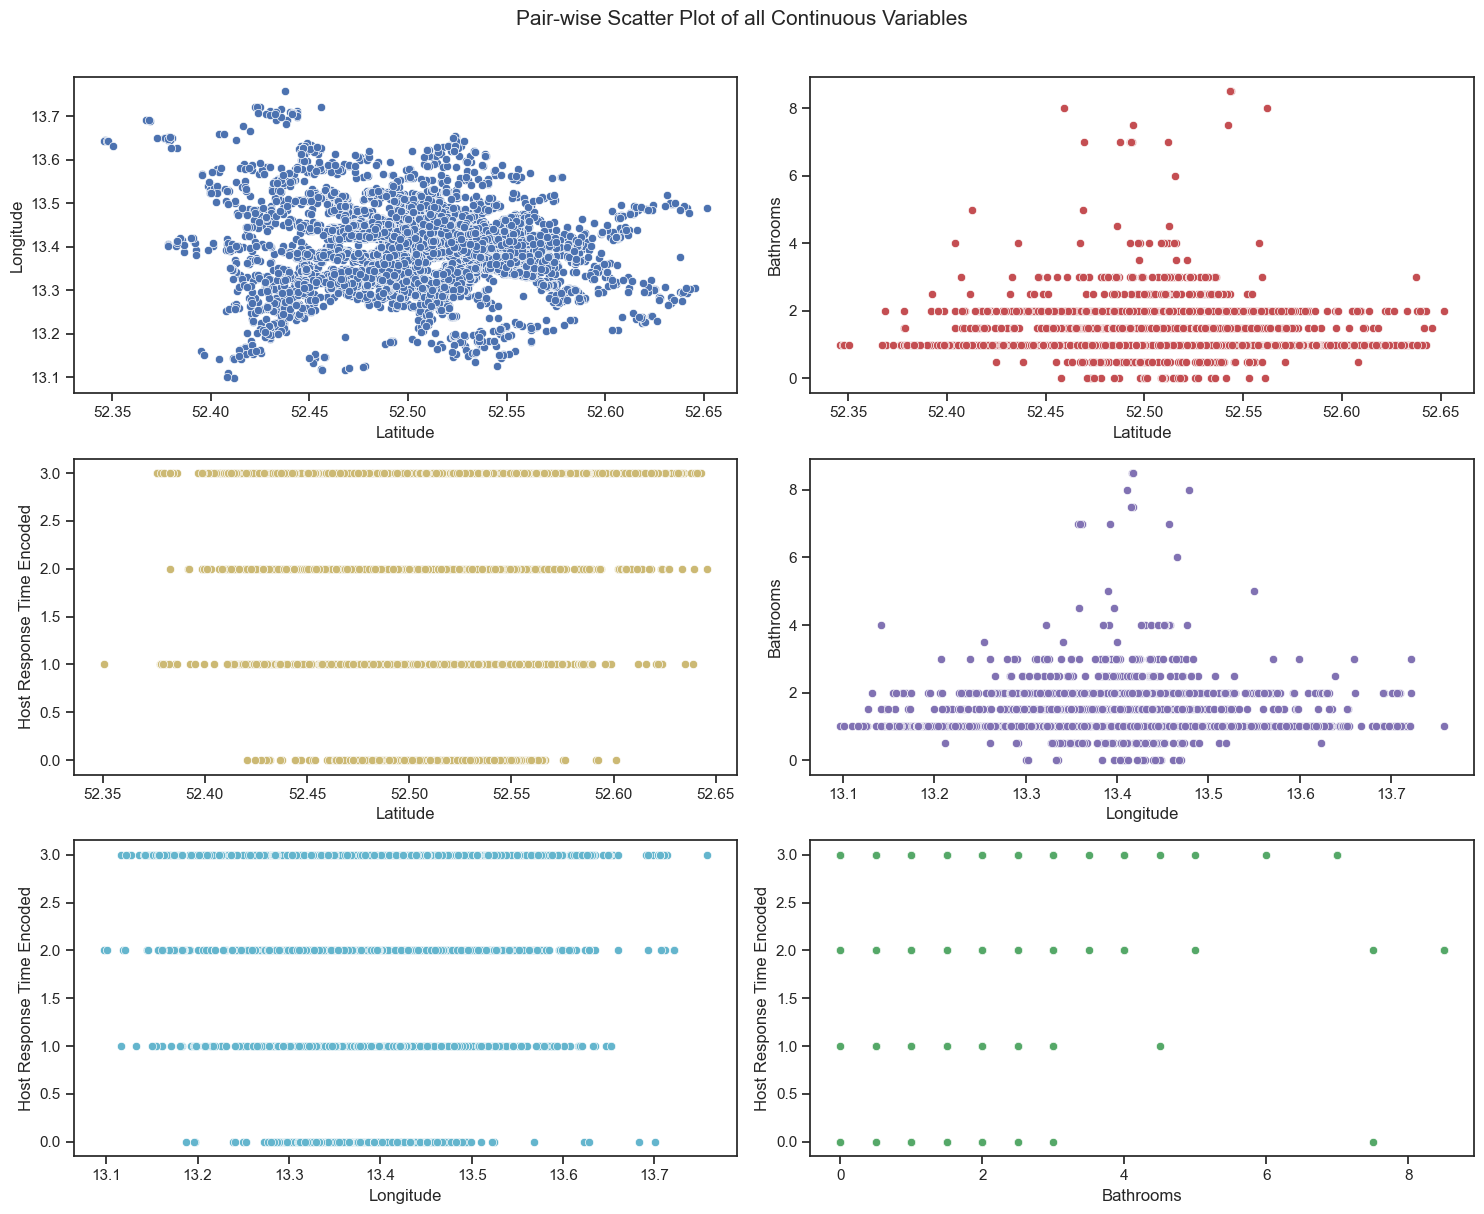

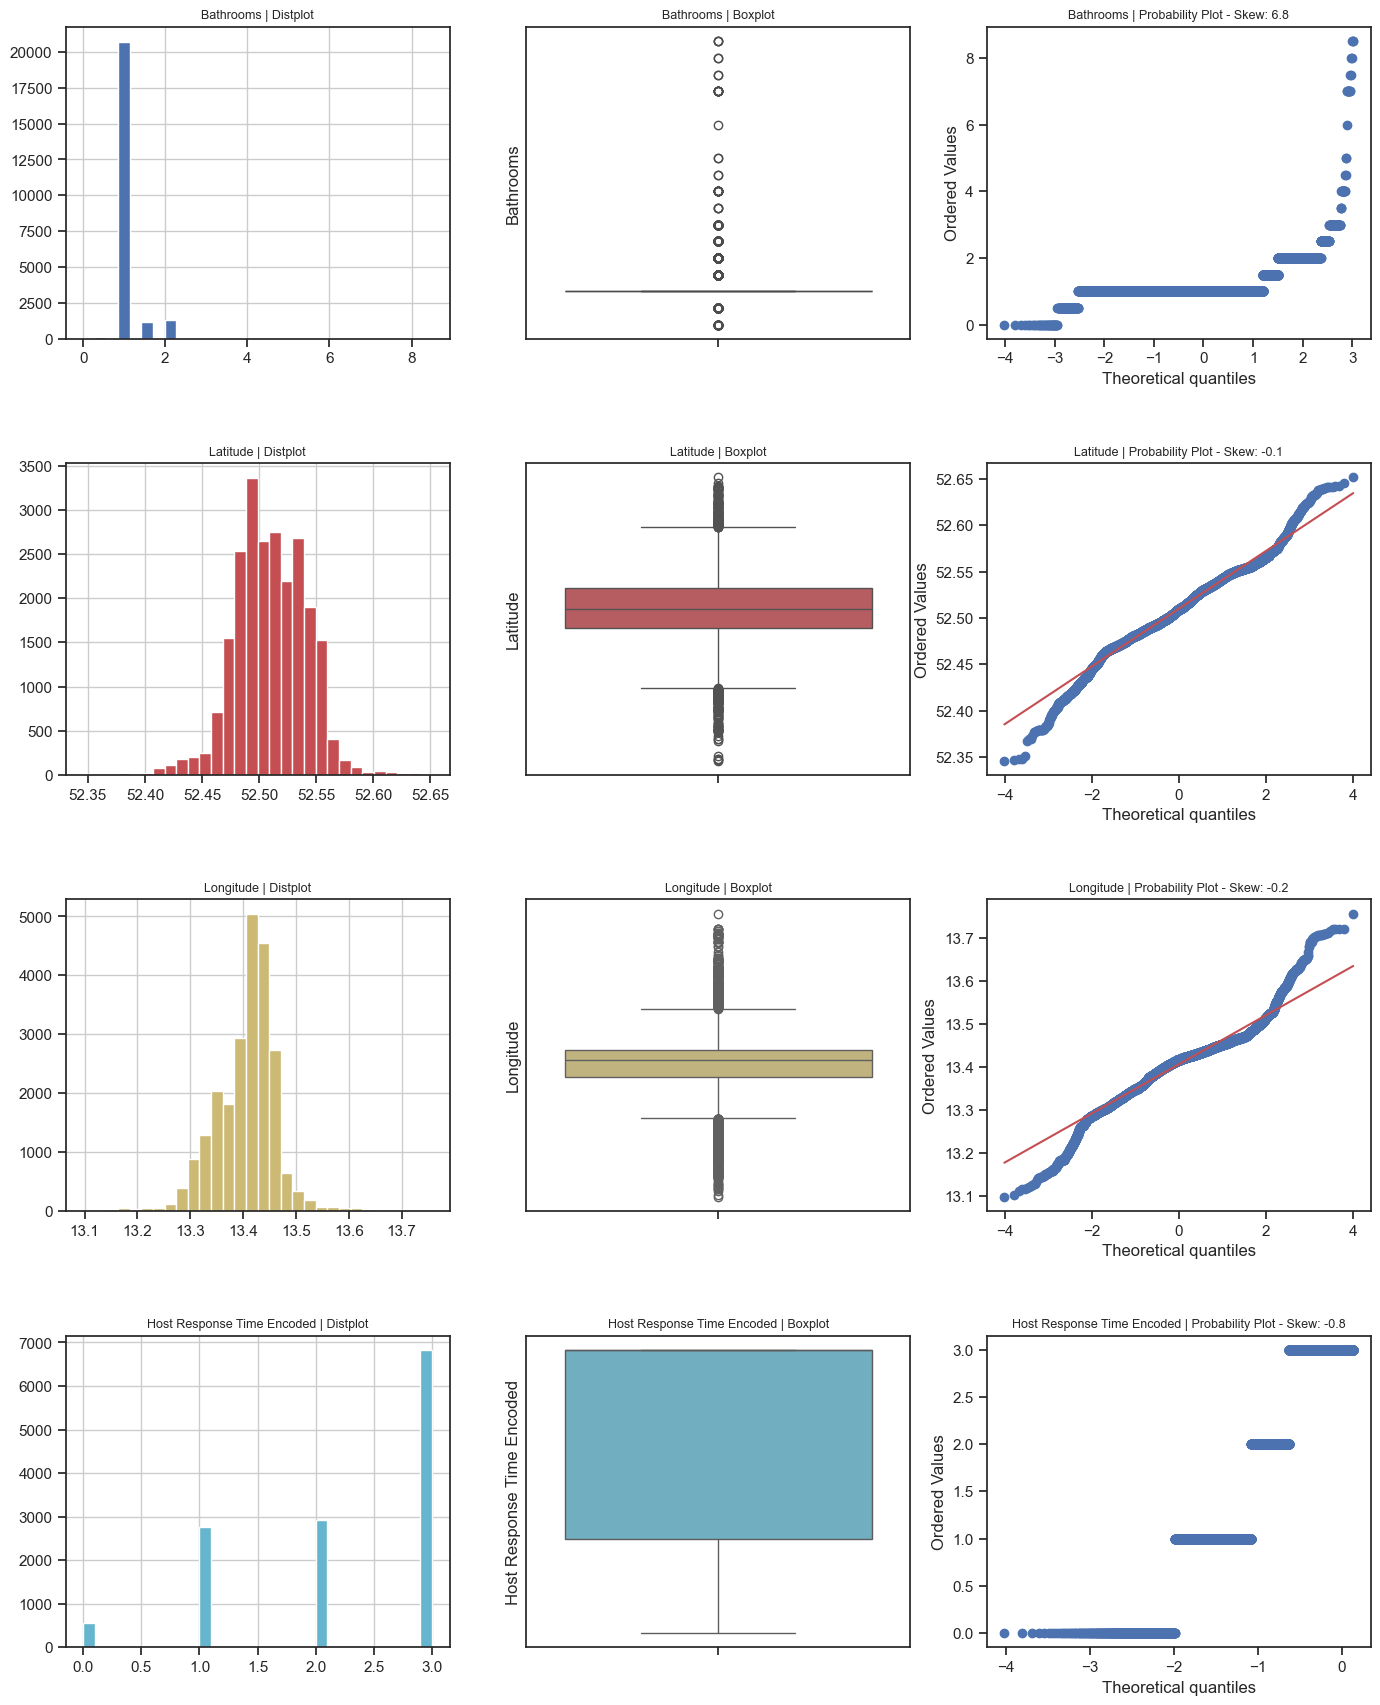

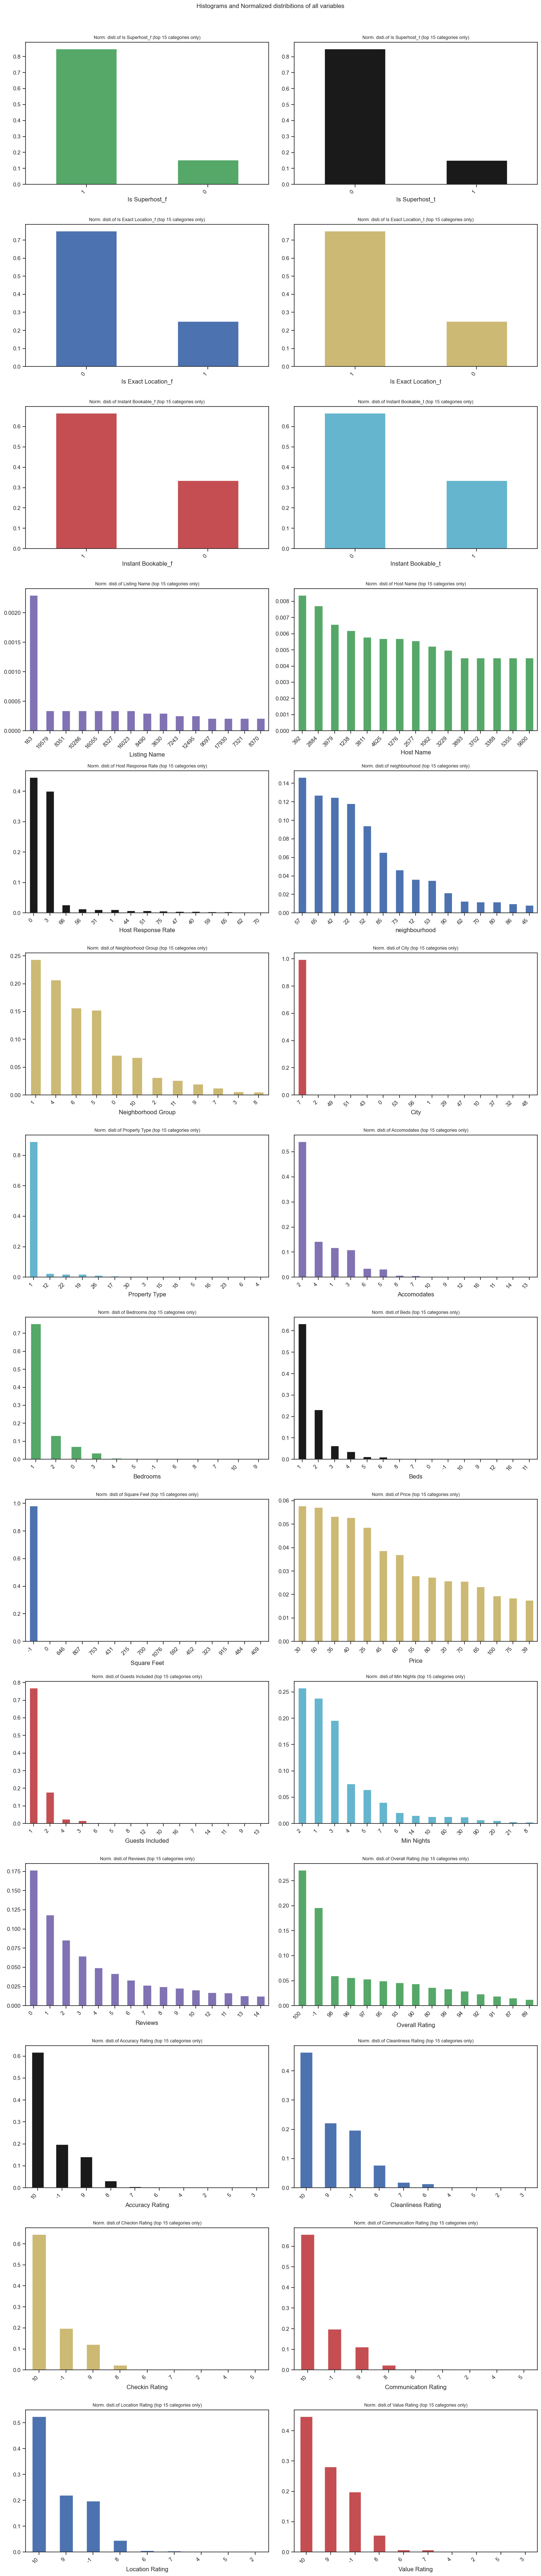

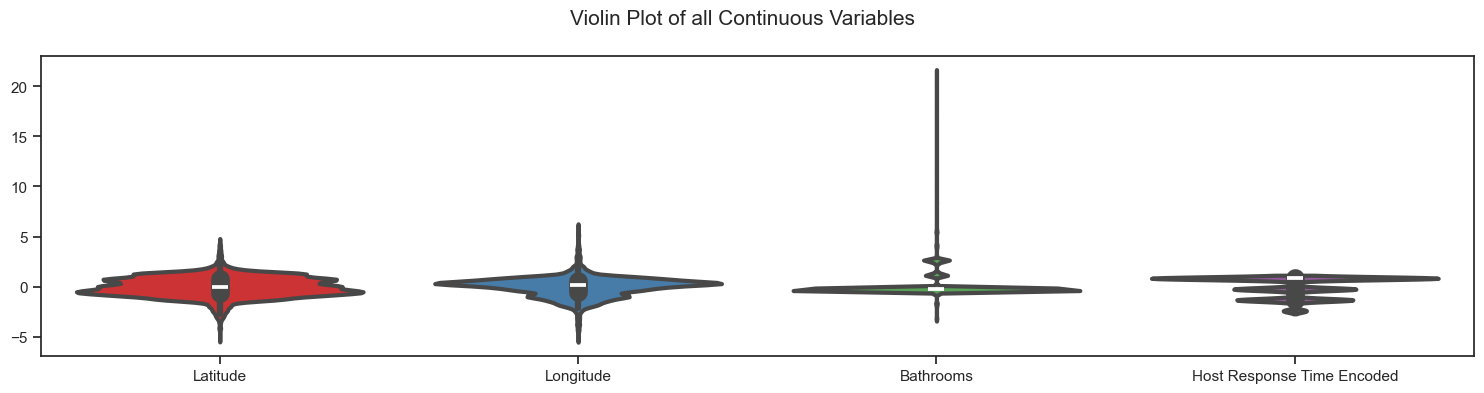

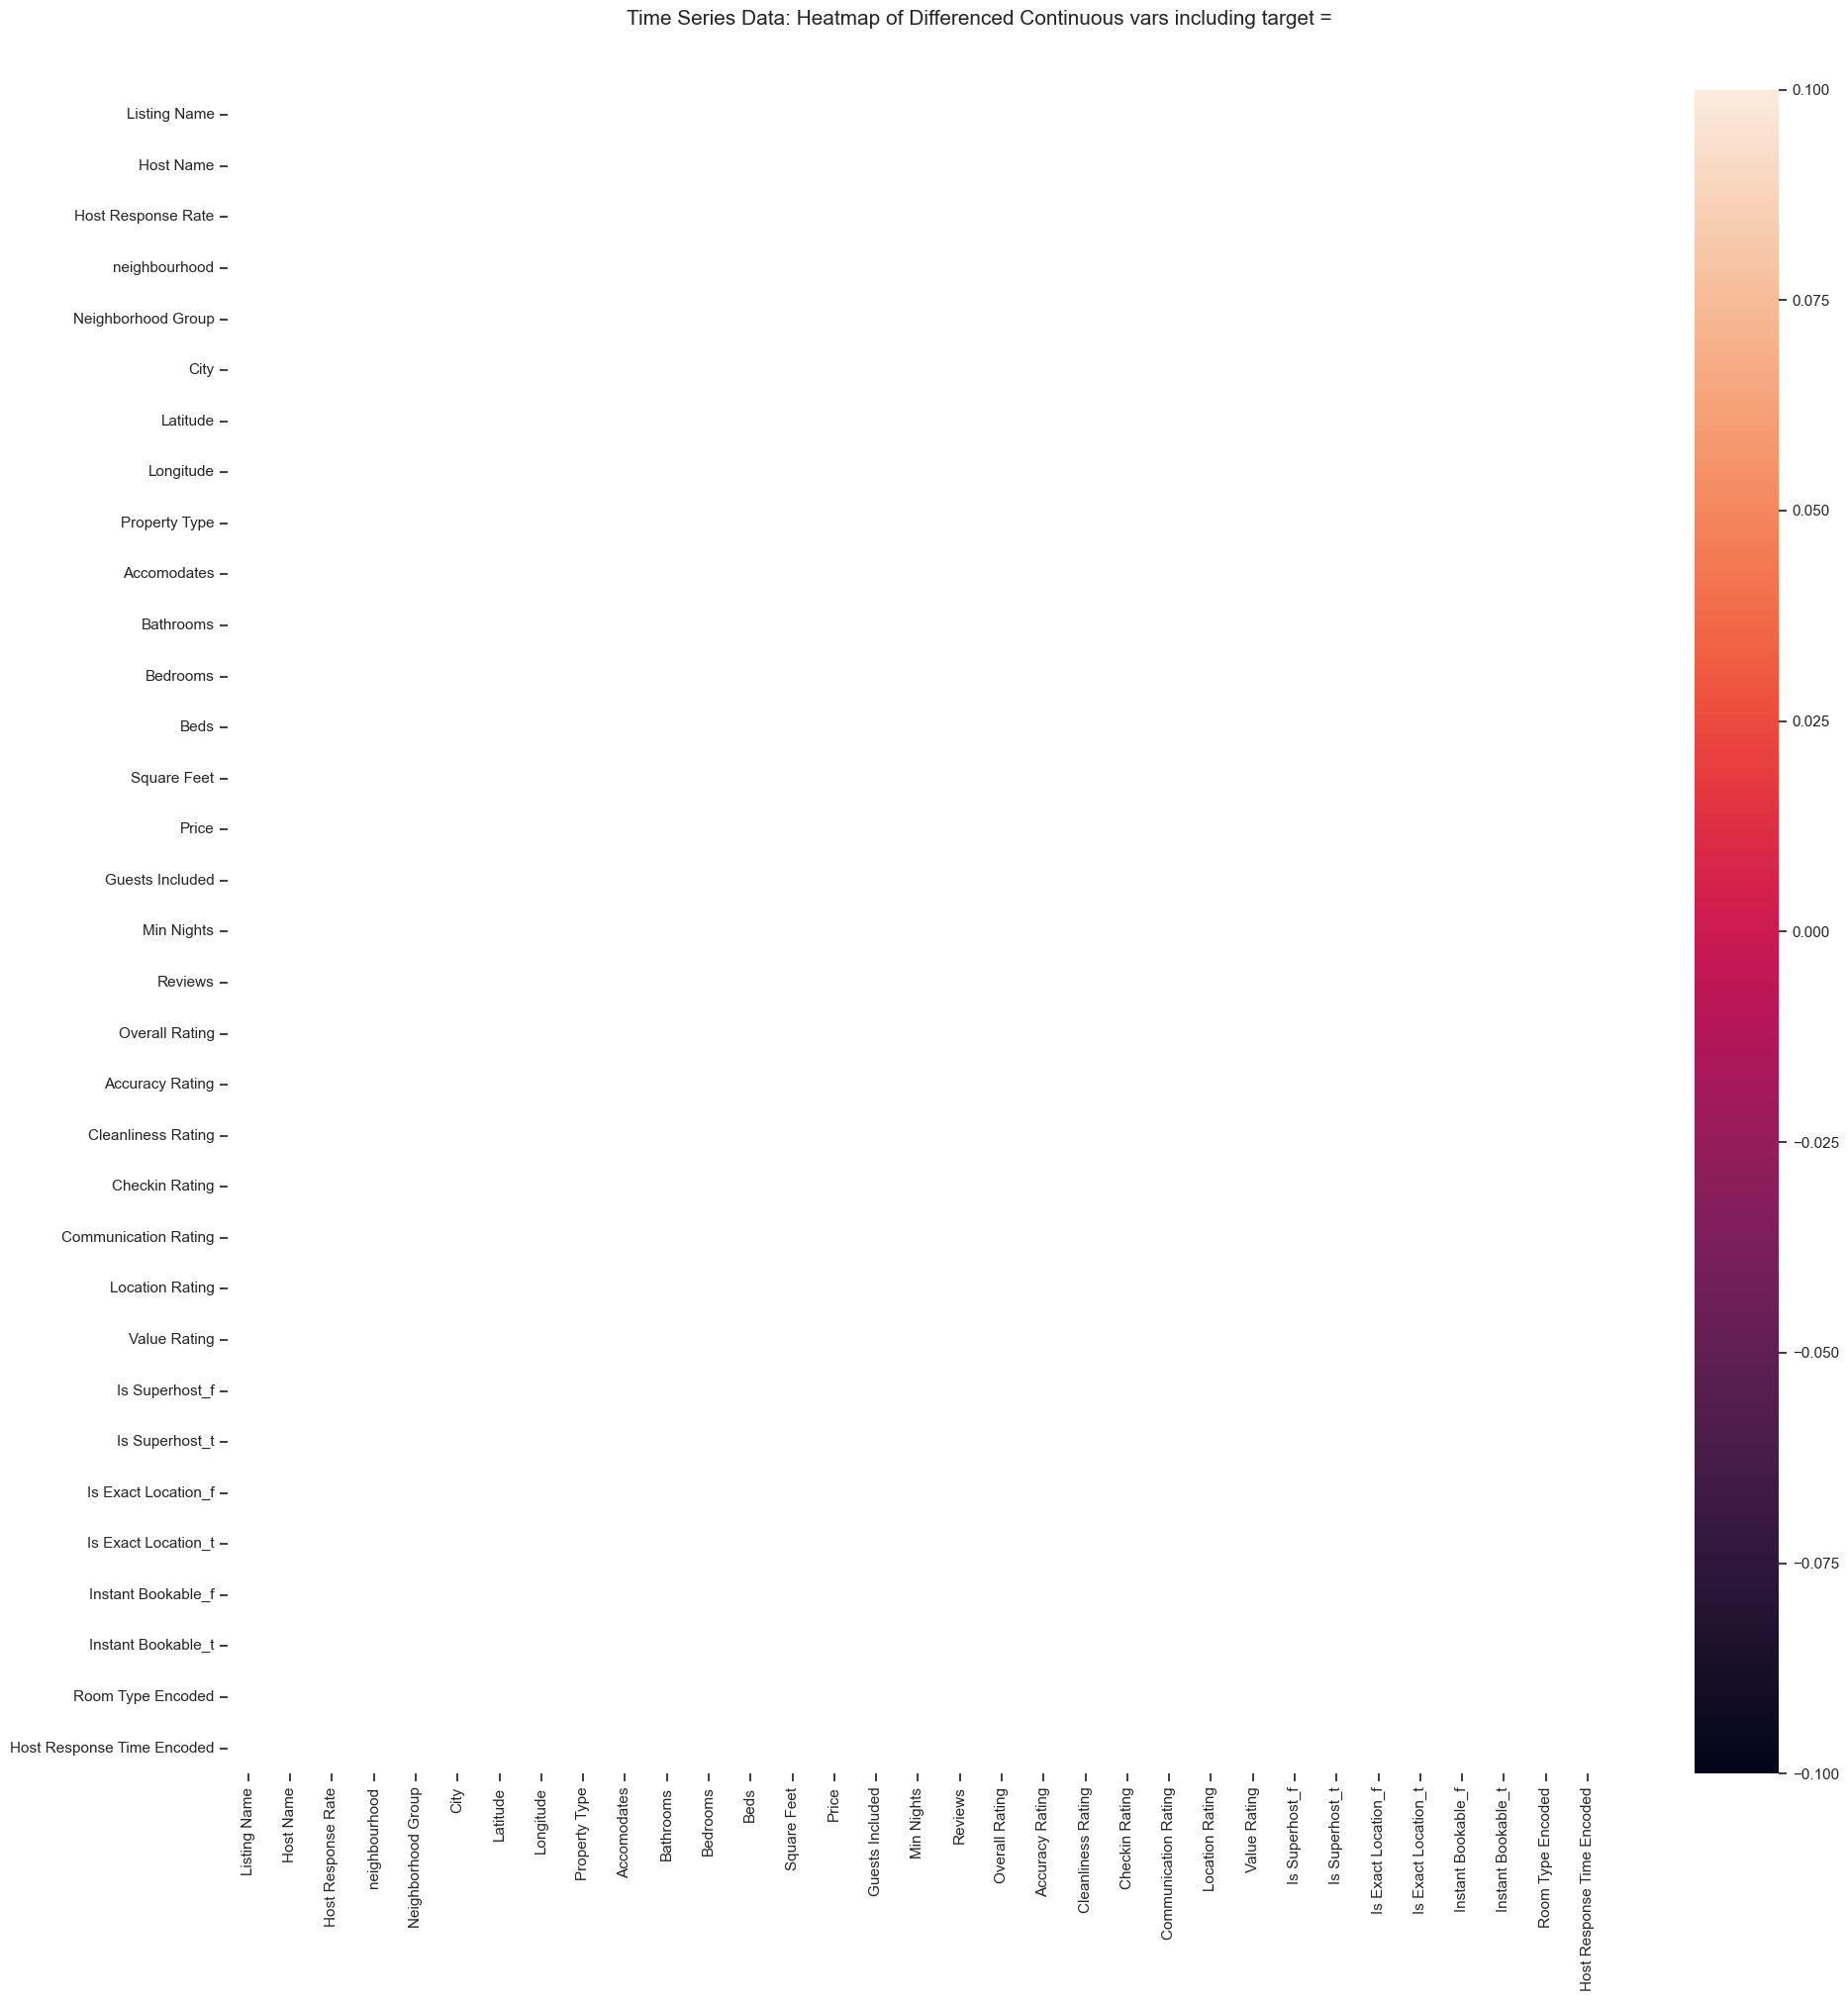

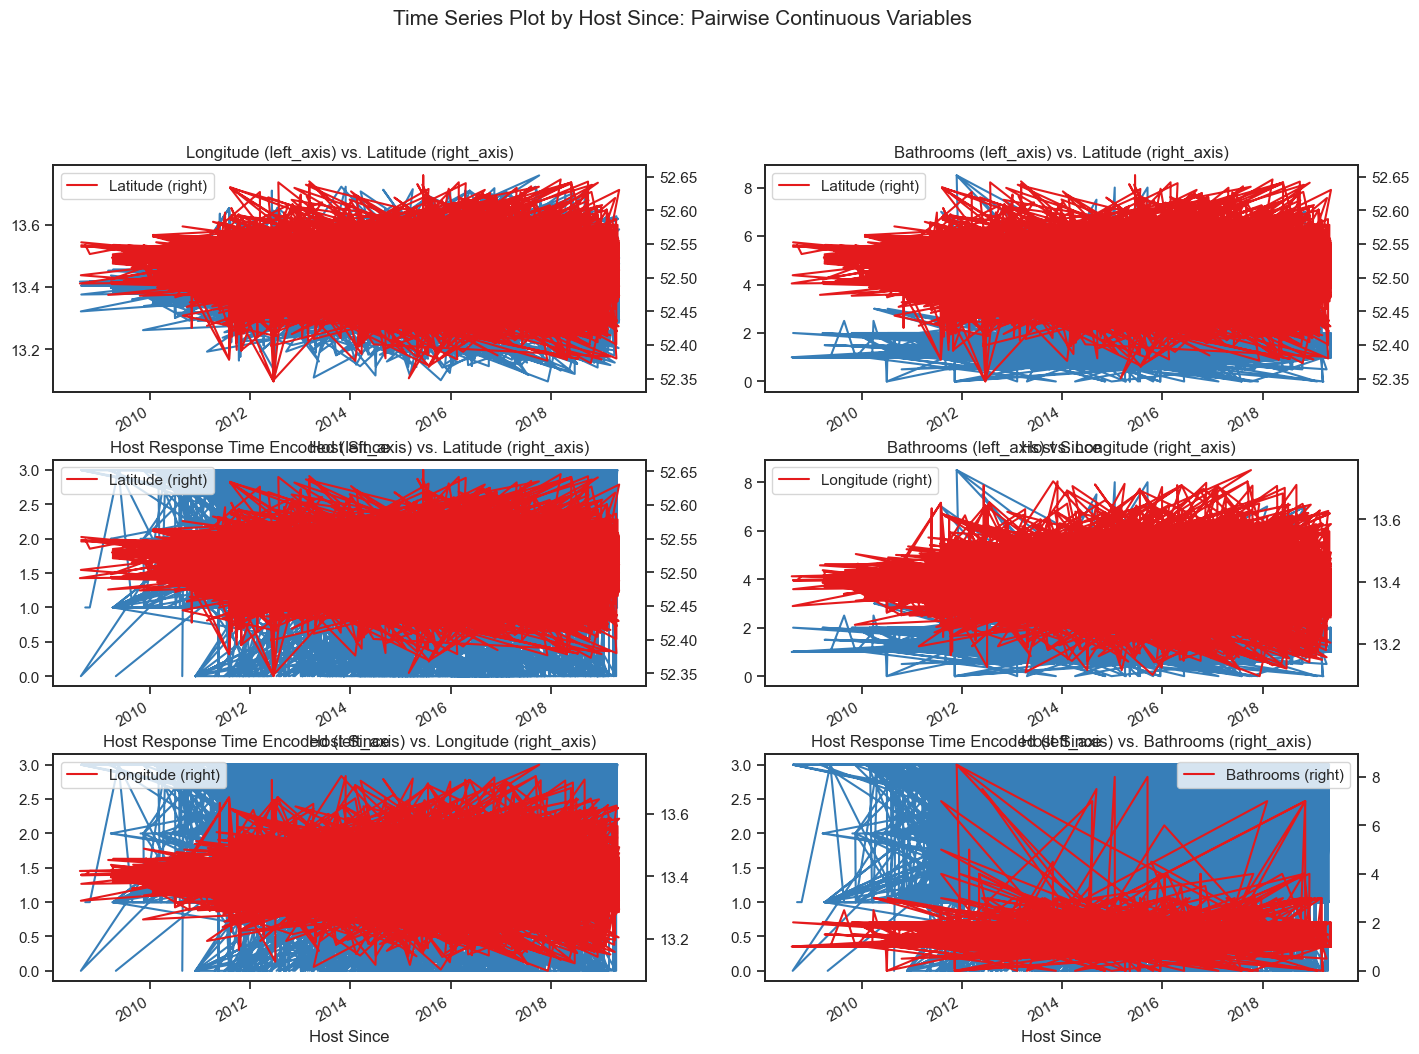

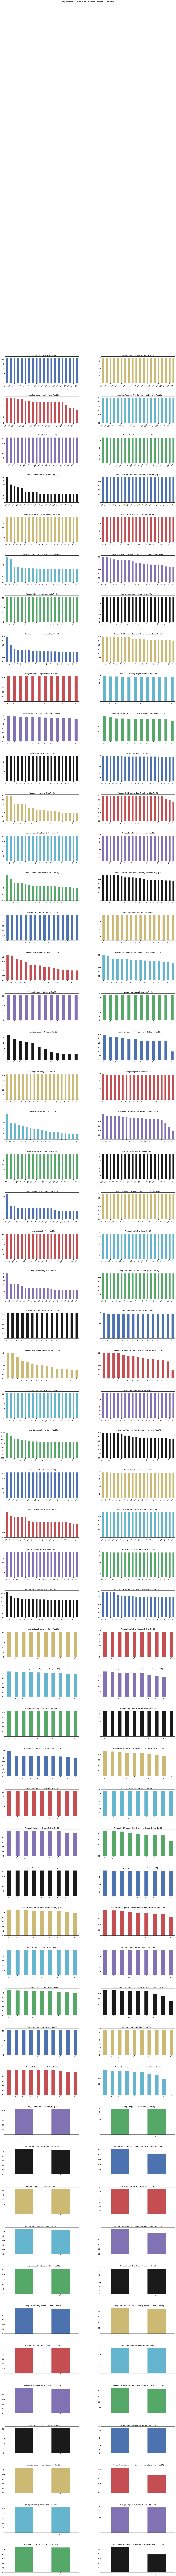

All Plots done
Time to run AutoViz = 72 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


Listing Name  Host Name Host Since  Host Response Rate  neighbourhood  \
0          15063       3979    2008-09-16          31               65         
1           9407        862    2008-10-19          31               65         
2           5167        853    2009-05-16           3               65         
3          10383       4625    2009-08-25           3               65         
4           1970       1054    2009-11-18           3               65         
...             ...        ...        ...                 ...            ...   
23529        343       2498    2018-10-23          51               83         
23530      20592        622    2019-05-13           0               52         
23531      17937       1758    2014-07-31           0                9         
23532       9601       3229    2019-05-13           0               43         
23533      13801       3672    2018-07-24           0               86         

       Neighborhood Group  City  Latitude  Longitude  Property Type  \
0               6            7   52.54851  13.40455         1         
1               6            7   52.53500  13.41758         1         
2               6            7   52.54316  13.41509         1         
3               6            7   52.53303  13.41605         1         
4               6            7   52.54785  13.40556         1         
...                   ...   ...       ...        ...            ...   
23529           9            7   52.42278  13.16120         1         
23530           6            7   52.63020  13.49340         1         
23531           5            7   52.45402  13.43864         1         
23532          11            7   52.47342  13.58483         1         
23533           6            7   52.54929  13.46067         1         

       Accomodates  Bathrooms  Bedrooms  Beds  Square Feet  Price  \
0           2          1.0         1       1        -1        17    
1           4          1.0         1       2       720        90    
2           2          1.0         1       2        -1        33    
3           7          2.5         4       7        -1       180    
4           1          1.0         0       1        -1        70    
...            ...        ...       ...   ...          ...    ...   
23529       3          1.0         1       2        -1        48    
23530       2          1.0         2       2        -1        30    
23531       1          1.5         1       1        -1        17    
23532       6          1.0         3       4        -1        52    
23533       3          1.0         2       2        -1        65    

       Guests Included  Min Nights  Reviews First Review Last Review  \
0             1              2          7    2018-07-04   2019-04-21   
1             2             62        144    2009-06-20   2018-10-29   
2             1              2        229    2009-08-18   2019-05-08   
3             5              6          6    2015-08-09   2018-07-23   
4             1             90         23    2010-06-29   2018-11-01   
...                ...         ...      ...          ...         ...   
23529         1             13          0           NaT          NaT   
23530         2              5          0           NaT          NaT   
23531         1              2          0           NaT          NaT   
23532         1              2          0           NaT          NaT   
23533         1              2          0           NaT          NaT   

       Overall Rating  Accuracy Rating  Cleanliness Rating  Checkin Rating  \
0            100             10                 10                10         
1             92              9                  9                 9         
2             96             10                 10                10         
3            100             10                 10                10         
4             93             10                 10                 9         
...               ...          

In [620]:
AV.AutoViz(
    filename="",  # Leave filename empty
    sep=",",
    depVar="",  # Specify your dependent variable if any
    dfte=df,  # Pass your DataFrame here
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=24000,
    max_cols_analyzed=29
)

In [574]:
# Finally, label all remaining category columns
from sklearn.preprocessing import LabelEncoder
# Initialize the label encoder
le = LabelEncoder()
# Select string columns
string_cols = df.select_dtypes(include='string').columns
# Calculate and print unique values for each string column
for col in string_cols:
# Encode the categorical columns and add them back to the DataFrame
    df[col].fillna('-1', inplace=True)  # Replace NaN with 'Unknown'
    df[col] = le.fit_transform(df[col])
    print (df[col].min(),' - ',df[col].max())

0  -  22835
0  -  6183
0  -  75
0  -  92
0  -  11
0  -  59
0  -  34


In [575]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23534 entries, 0 to 23533
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Listing Name                23534 non-null  int32         
 1   Host Name                   23534 non-null  int32         
 2   Host Since                  23513 non-null  datetime64[ns]
 3   Host Response Rate          23534 non-null  int32         
 4   neighbourhood               23534 non-null  int32         
 5   Neighborhood Group          23534 non-null  int32         
 6   City                        23534 non-null  int32         
 7   Latitude                    23534 non-null  float64       
 8   Longitude                   23534 non-null  float64       
 9   Property Type               23534 non-null  int32         
 10  Accomodates                 23534 non-null  int64         
 11  Bathrooms                   23505 non-null  float64   

In [576]:
df.shape

(23534, 36)

In [577]:
#NOT WORKING. GETS STUCK IN THE PIP INSTALL STAGE
# !pip install dataprep
# from dataprep.eda import create_report
#report = create_report(df)
#report.show_browser()

In [578]:
pd.set_option('display.max_columns', None)  # Display all columns
df.describe()

Listing Name    Host Name            Host Since            \
count  23534.000000  23534.000000                          23513   
mean   11366.802626   3046.701113  2015-04-30 15:55:34.206609152   
min        0.000000      0.000000            2008-08-08 00:00:00   
25%     5679.250000   1521.000000            2013-11-16 00:00:00   
50%    11330.500000   3060.500000            2015-06-04 00:00:00   
75%    17068.750000   4551.000000            2016-09-18 00:00:00   
max    22835.000000   6183.000000            2019-05-13 00:00:00   
std     6593.728710   1738.857388                            NaN   

       Host Response Rate  neighbourhood  Neighborhood Group      City      \
count     23534.000000     23534.000000      23534.000000     23534.000000   
mean          8.867426        52.397850          4.131087         7.125648   
min           0.000000         0.000000          0.000000         0.000000   
25%           0.000000        42.000000          1.000000         7.000000   
50%           3.000000        57.000000          4.000000         7.000000   
75%           3.000000        65.000000          6.000000         7.000000   
max          75.000000        92.000000         11.000000        59.000000   
std          19.395475        21.532587          2.941320         2.229754   

         Latitude      Longitude   Property Type   Accomodates    Bathrooms   \
count  23534.000000  23534.000000  23534.000000   23534.000000  23505.000000   
mean      52.509906     13.406191      2.869763       2.671794      1.095980   
min       52.345800     13.097180      0.000000       1.000000      0.000000   
25%       52.489180     13.375730      1.000000       2.000000      1.000000   
50%       52.509210     13.416565      1.000000       2.000000      1.000000   
75%       52.532670     13.439538      1.000000       3.000000      1.000000   
max       52.651670     13.757640     34.000000      16.000000      8.500000   
std        0.031279      0.058576      5.740281       1.567866      0.346164   

         Bedrooms        Beds       Square Feet      Price     \
count  23534.000000  23534.000000  23534.000000  23534.000000   
mean       1.159939      1.637886      7.815161     69.611243   
min       -1.000000     -1.000000     -1.000000      0.000000   
25%        1.000000      1.000000     -1.000000     32.000000   
50%        1.000000      1.000000     -1.000000     49.000000   
75%        1.000000      2.000000     -1.000000     75.000000   
max       10.000000     22.000000   4639.000000   9000.000000   
std        0.663436      1.231985     95.149367    216.669382   

       Guests Included   Min Nights      Reviews    \
count   23534.000000    23534.000000  23534.000000   
mean        1.346180        6.898020     19.240418   
min         1.000000        1.000000      0.000000   
25%         1.000000        2.000000      1.000000   
50%         1.000000        3.000000      5.000000   
75%         1.000000        4.000000     17.000000   
max        16.000000     1000.000000    545.000000   
std         0.856327       24.880068     40.361828   

               First Review                   Last Review            \
count                          19379                          19379   
mean   2017-03-06 16:22:29.419474688  2018-07-06 05:15:08.220238336   
min              2009-06-20 00:00:00            2011-08-22 00:00:00   
25%              2016-02-18 12:00:00            2018-01-15 00:00:00   
50%              2017-07-09 00:00:00            2019-01-02 00:00:00   
75%              2018-07-08 00:00:00            2019-04-23 00:00:00   
max              2019-05-14 00:00:00            2019-05-14 00:00:00   
std                              NaN                            NaN   

       Overall Rating  Accuracy Rating  Cleanliness Rating  Checkin Rating  \
count   23534.000000    23534.000000       23534.000000      23534.000000    
mean       75.799652        7.571004           7.295912          7.602108    
min        -1.000000   

In [579]:
import matplotlib.pyplot as plt
import seaborn as sb

<Axes: xlabel='Price', ylabel='count'>

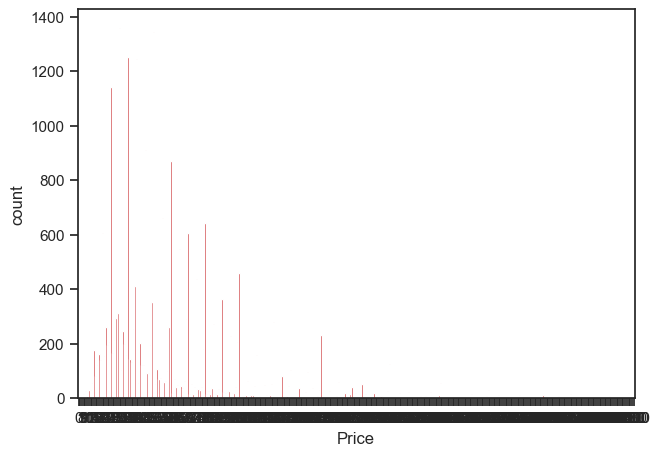

In [580]:
sb.countplot(x='Price', data=df)